In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from ANEMO import ANEMO

# extracting data and doing the fit on velocity

In [3]:
from ANEMO.edfreader import read_edf

import pickle
with open('../demo/result/param_Fit_AM.pkl', 'rb') as fichier:
    param = pickle.load(fichier, encoding='latin1')
with open('../demo/data/enregistrement_AM_2017-10-23_100057.pkl', 'rb') as fichier:
    file_exp = pickle.load(fichier, encoding='latin1')

datafile = '../demo/data/enregistrement_AM_2017-10-23_100057.asc'
data = read_edf(datafile, 'TRIALID')

expfile = 'data/enregistrement_AM_2017-10-23_100057.pkl'

try :
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')
except :
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.pkl'
    
    with open(expfile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')

In [4]:
A1 = ANEMO(exp)

In [5]:
A2 = ANEMO.Fit(exp)

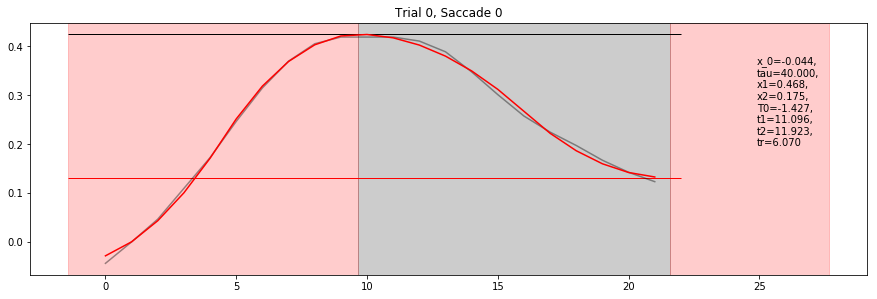

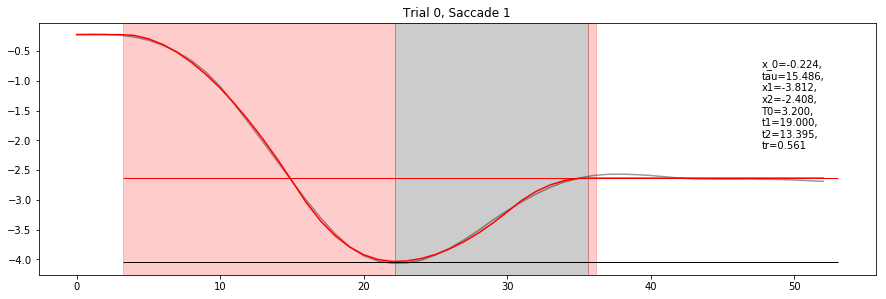

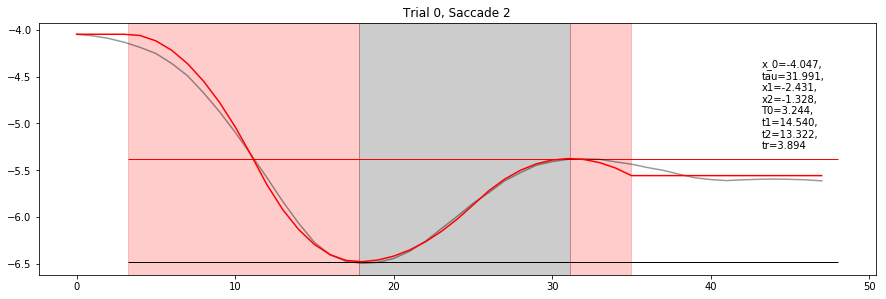

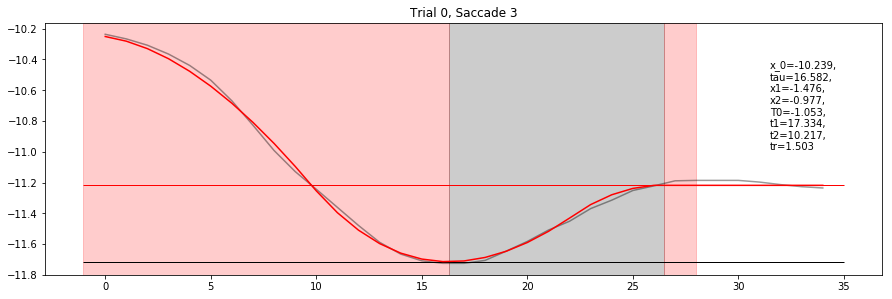

In [6]:
block = 0
debut, fin = 0, 15  

for trial in range(1) :

    arg = A1.arg(data, trial, block)
    t_0 = arg.t_0
    data_1 = (arg.data_x-(arg.data_x[arg.StimulusOf-t_0])) / arg.px_per_deg

    
    for s in range(len(arg.saccades)):
        data_sacc  = data_1[arg.saccades[s][0]-t_0+debut:arg.saccades[s][1]-t_0+fin]
        f = A2.Fit_trial(data_trial=data_sacc,fct_fit='fct_saccade')
                
        fig_width= 15
        fig, axs = plt.subplots(1, 1, figsize=(fig_width, (fig_width/2)/1.6180))

        parti_1 = [f.values['T0'], f.values['T0']+f.values['t1']]
        parti_2 = [f.values['T0']+f.values['t1'], f.values['T0']+f.values['t1']+f.values['t2']]
        parti_3 = [f.values['T0']+f.values['t1']+f.values['t2'], f.values['T0']+f.values['t1']+f.values['t2']+f.values['tr']]
        
        axs.axvspan(parti_1[0], parti_1[1], color='r', alpha=0.2)
        axs.axvspan(parti_2[0], parti_2[1], color='k', alpha=0.2)
        axs.axvspan(parti_3[0], parti_3[1], color='r', alpha=0.2)


        axs.hlines(f.values['x1']+f.values['x_0'], f.values['T0'], len(data_sacc), color='k', lw=1)
        axs.hlines(f.values['x2']+f.values['x_0'], f.values['T0'], len(data_sacc), color='r', lw=1)

        axs.plot(data_sacc, color='k', alpha=0.4)

        fit = A1.Equation.fct_saccade(range(len(data_sacc)), f.values['x_0'], f.values['tau'],
                                      f.values['x1'], f.values['x2'], f.values['T0'],
                                      f.values['t1'], f.values['t2'], f.values['tr'],do_whitening=False)
        
        
        axs.set_title('Trial %s, Saccade %s'%(trial, s))
        t = max(len(fit), parti_3[1])
        
        axs.text(t-t/10, max(fit)-(max(fit)-min(fit))/2,
                 'x_0=%0.3f,\ntau=%0.3f,\nx1=%0.3f,\nx2=%0.3f,\nT0=%0.3f,\nt1=%0.3f,\nt2=%0.3f,\ntr=%0.3f'%(f.values['x_0'], f.values['tau'],
                                                                               f.values['x1'], f.values['x2'],
                                                                               f.values['T0'], f.values['t1'],
                                                                               f.values['t2'], f.values['tr']))
        
        
        axs.plot(fit, color='R');